# Reducción Dimensionalidad Iris DataSet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Lectura de datos

In [2]:
df = pd.read_csv('iris-data.csv')

In [3]:
df.head(2)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [4]:
df.shape

(150, 4)

El set de datos siene 150 mediciones y 4 variables

### Escalamiento de datos

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [7]:
pd.DataFrame(scaled_data[:5,:],columns=df.columns)

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### Análisis de Dimensionalidad

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA().fit(scaled_data)

In [10]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [11]:
np.cumsum(pca.explained_variance_ratio_)

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

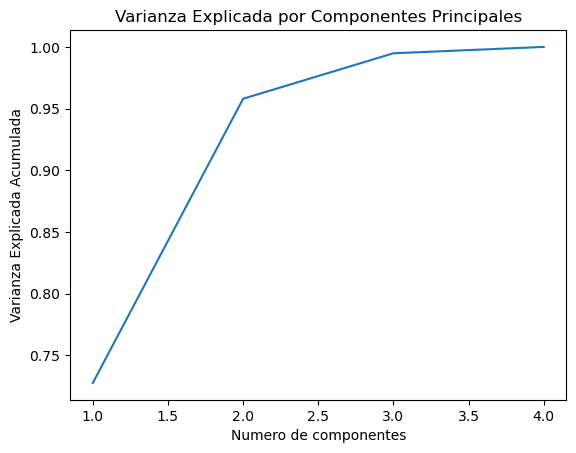

In [12]:
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Componentes Principales')
plt.show()

Los dos primeros componentes **explican el 95% de la varianza** de los datos

### Reducción de dimensionalidad

In [13]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [14]:
# Visualizando la matriz de transformacion
componentes = pd.DataFrame(pca.components_,columns=df.columns)
componentes

,sepal length,sepal width,petal length,petal width
0,0.522372,-0.263355,0.581254,0.565611
1,0.372318,0.925556,0.021095,0.065416


<Axes: >

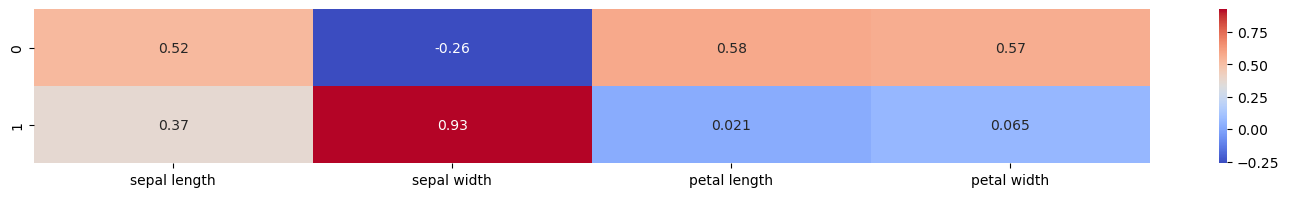

In [15]:
plt.figure(figsize=(18,2))
sns.heatmap(componentes, annot=True, cmap='coolwarm')

In [16]:
# Antes de aplicar la reducción de dimensionalidad
scaled_data.shape

(150, 4)

In [17]:
# Después de aplicar la reducción de dimensionalidad
x_pca.shape

(150, 2)

In [18]:
pd.DataFrame(x_pca,columns=['PC1','PC2'])

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


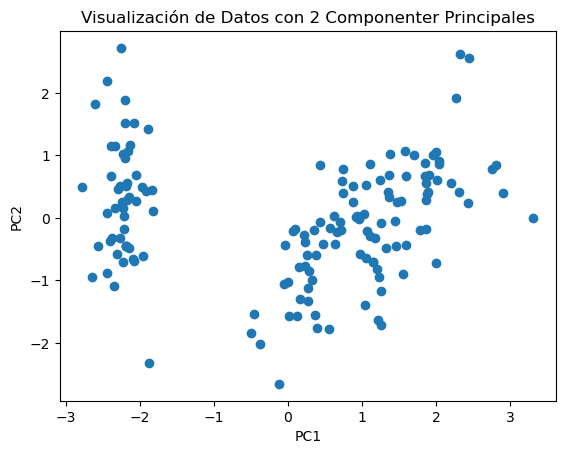

In [19]:
# Visualización de los datos con 2 Componentes
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualización de Datos con 2 Componenter Principales')
plt.show()

### Análisis de clusterización

In [20]:
from sklearn.cluster import KMeans

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

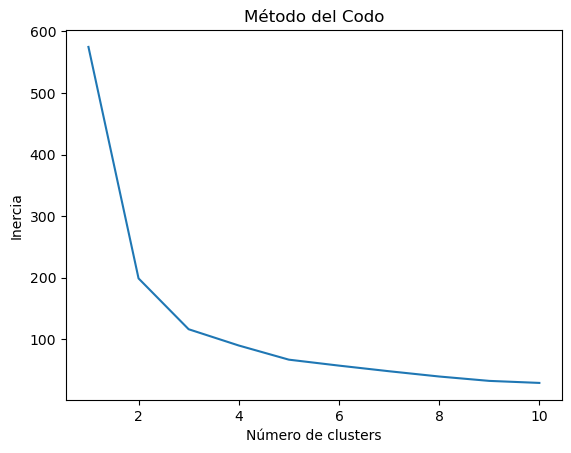

In [21]:
# Método del Codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

De acuerdo al método del codo, se observa que la recomendación es de 3 clusters

### Clusterización con k=3

In [22]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_pca)

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [23]:
kmeans.cluster_centers_

array([[-2.22019328,  0.29222482],
       [ 0.61198392, -0.79925263],
       [ 1.71890108,  0.65217008]])

In [24]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [25]:
clases = pd.read_csv('iris-classes.csv')
clases

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


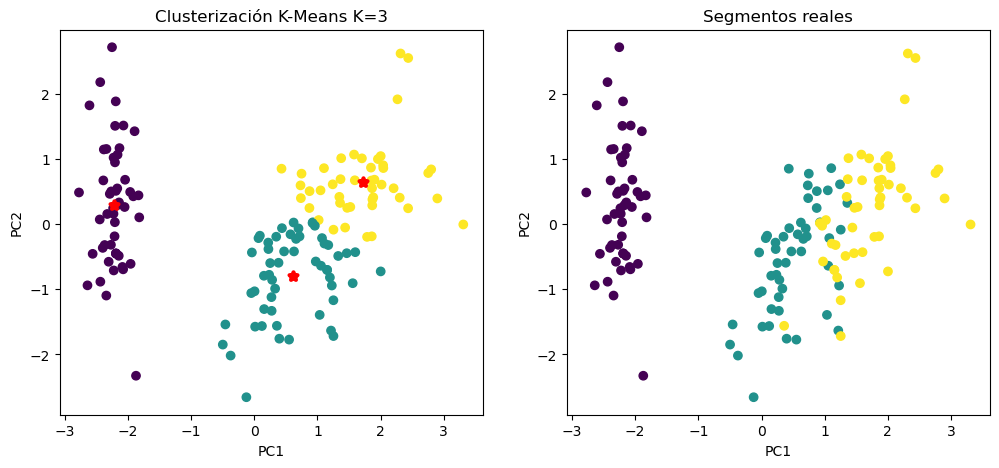

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Clusterización K-Means K=3')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(x_pca[:,0],x_pca[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c='r', marker='*', lw=3)
plt.subplot(1,2,2)
plt.title('Segmentos reales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(x_pca[:,0],x_pca[:,1], c=clases['class'].map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}))

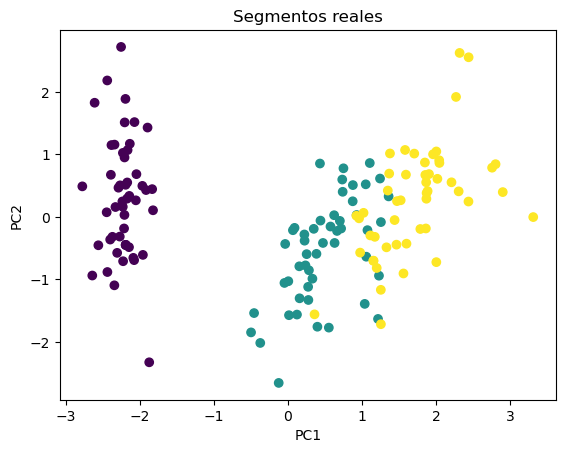

In [31]:
plt.title('Segmentos reales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(x_pca[:,0],x_pca[:,1], c=clases['class'].map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}))

### Clusterización con Gaussian Mixture

In [27]:
from sklearn.mixture import GaussianMixture

In [28]:
# now let's try GMM clustering, which tries to fit normally-distributed clusters, 
# and might be the case when measuring things like petal and sepal sizes...
gmm = GaussianMixture(n_components=3)
gmm.fit(x_pca)

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=3)

In [29]:
# predict the cluster for each data point
y_cluster_gmm = gmm.predict(x_pca)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2], dtype=int64)

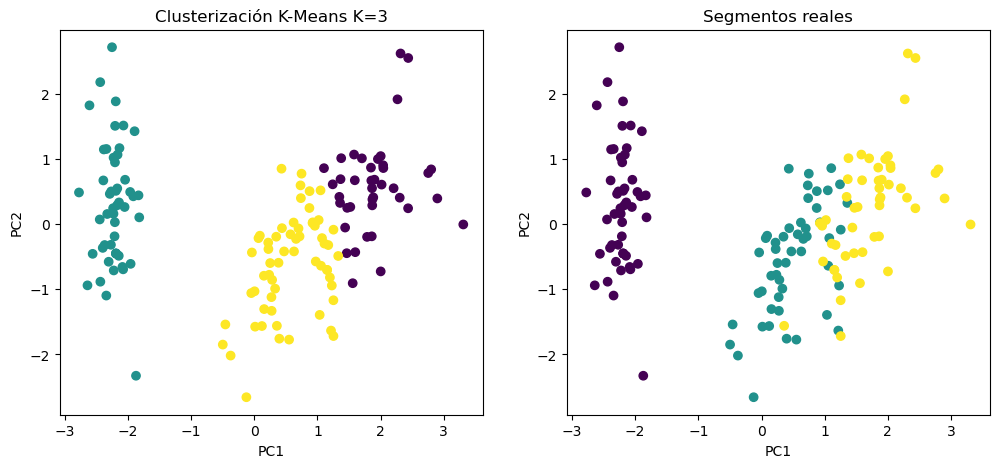

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Clusterización K-Means K=3')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(x_pca[:,0],x_pca[:,1], c=y_cluster_gmm)
plt.subplot(1,2,2)
plt.title('Segmentos reales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(x_pca[:,0],x_pca[:,1], c=clases['class'].map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}))

### Conclusiones

Principal Component Analysis (PCA) is useful for visualizing high-dimensional datasets, as it can compress it down to 2 dimensions. It's also useful for reducing the dimensionality of high-dimensional datasets, which require exponentially more data as the number of dimensions increase, but we didn't need to do that in this case because the dataset was rather small.

k-Means Clustering is biased towards spherical distributions of clusters, and makes hard assignments to clusters, but is very fast (linear in number of features and data points).

Gaussian Mixture Model (GMM) Clustering handles ellipsoidal distributions, and makes 'soft' assignments to clusters, but is much slower than k-means for large datasets.